# Baseball Case Study

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
(df.isna().sum()/len(df))*100 # checking null value in percentage

W      0.0
R      0.0
AB     0.0
H      0.0
2B     0.0
3B     0.0
HR     0.0
BB     0.0
SO     0.0
SB     0.0
RA     0.0
ER     0.0
ERA    0.0
CG     0.0
SHO    0.0
SV     0.0
E      0.0
dtype: float64

In [8]:
df.nunique() # checking duplicate value in dataset

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [9]:
df.drop_duplicates(inplace=True) # drop duplicate value
df.shape

(30, 17)

In [10]:
# removing white space
for column_name in df:
    df[column_name].astype(str).str.strip()

* In data set all columns are numerical
* No missing value in dataset
* There is no duplicate value in dataset

## Exploratory data analysis

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


* **Above statistical data mean and median are approximately similar that's why data is look like symmetric.**
* **"SB" ,"HR" and "E" have significantly large diffrent between Q3 and max value.**
* **CG shows min value as 0 but team with out any pitcher sounds like data entry error.**
* **H(Hit) is important feture in wining game.When team hit more it means more chance to win game.**

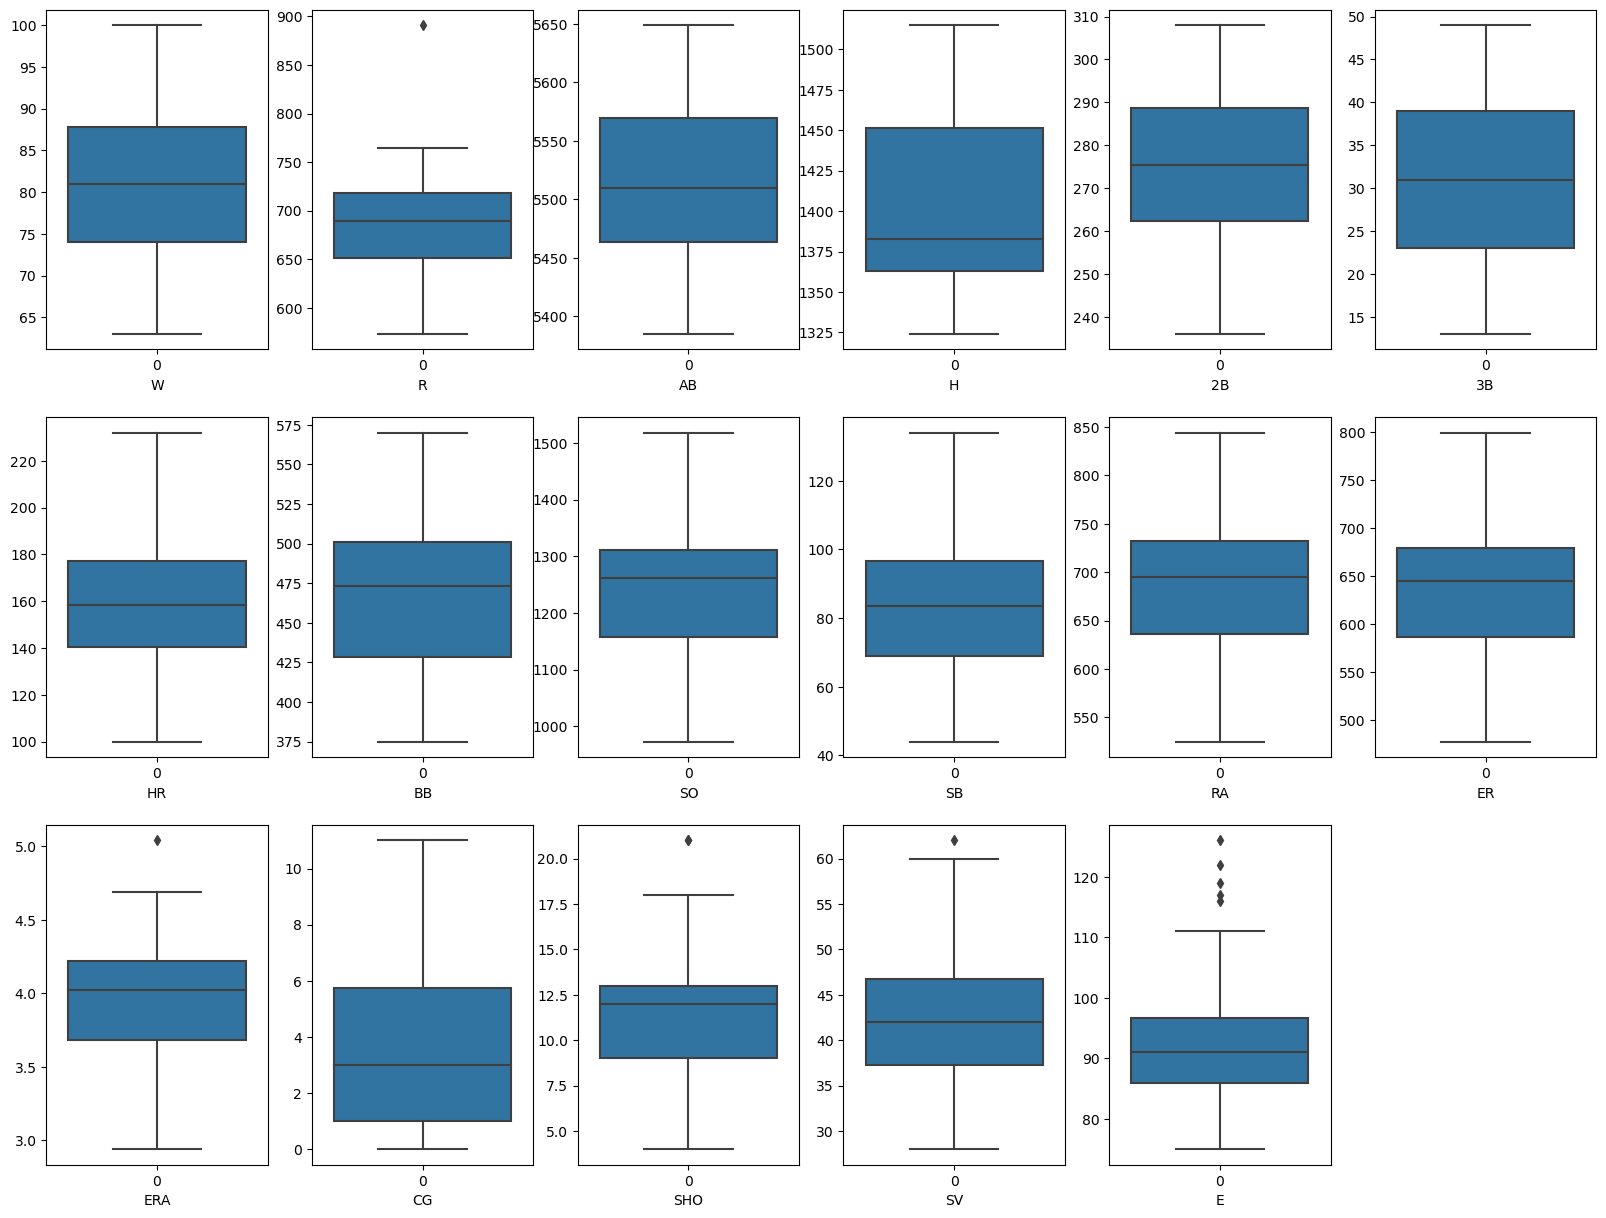

In [12]:
# checking outliers
plt.figure(figsize=(20,15))
num = 1
for i in df:
    if num <= 17:
        ax = plt.subplot(3,6,num)
        sns.boxplot(df[i])
        plt.xlabel(i)
    num +=1
plt.show()

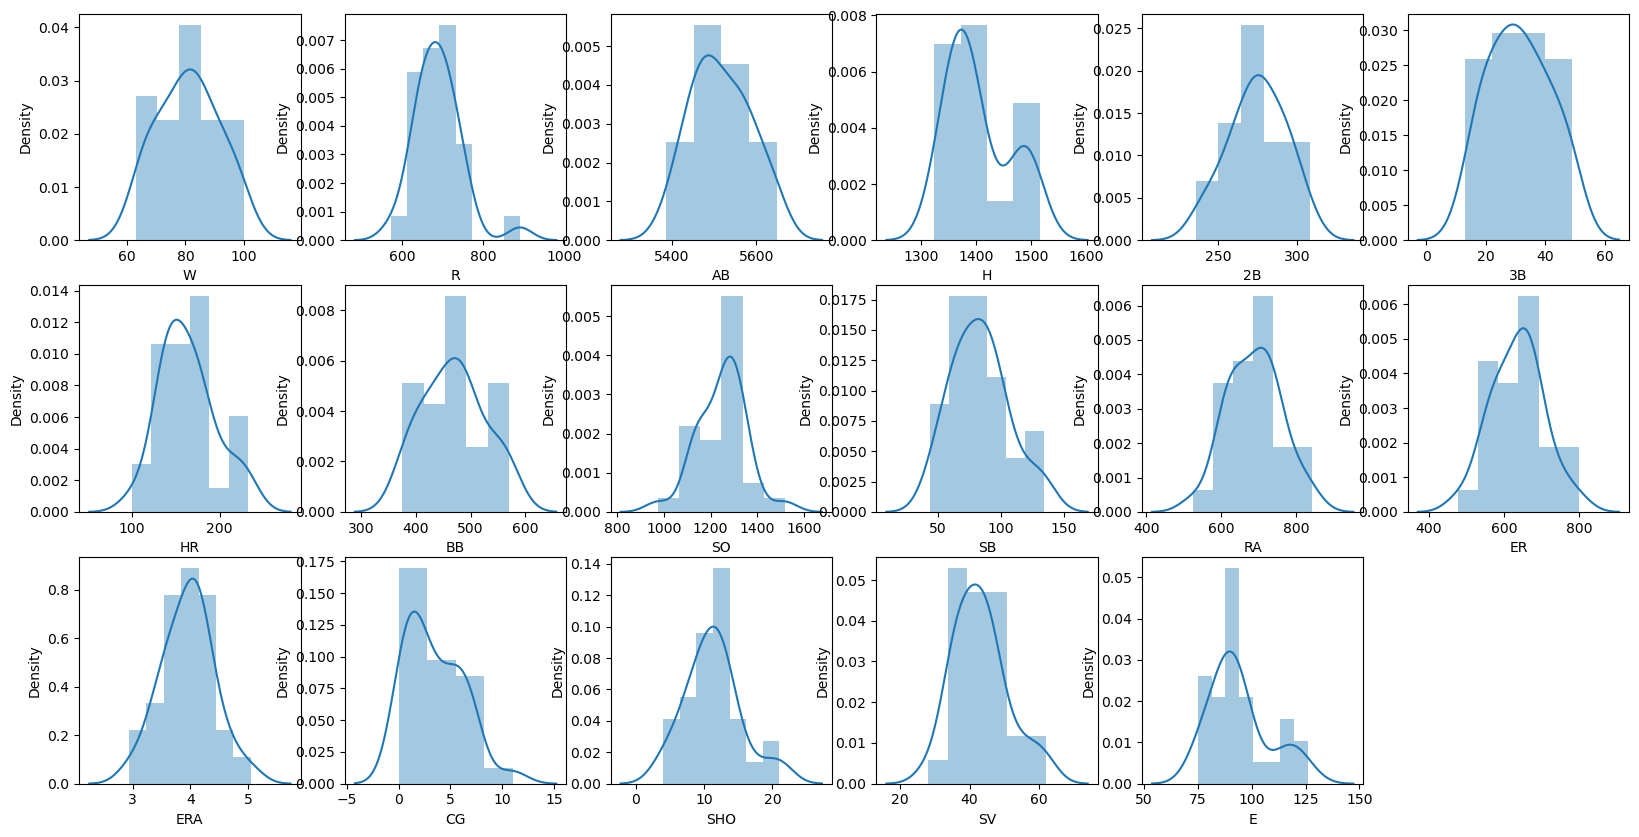

In [13]:
# checking skewness
plt.figure(figsize=(20,10))
num = 1
for i in df:
    if num <= 17:
        ax = plt.subplot(3,6,num)
        sns.distplot(df[i])
        plt.xlabel(i)
    num +=1
plt.show()

* **According to boxplot dataset has outliers** 
* **According to distribution plot most of columns are bell shape, that's why data is not skwed except CG**

#### Removing Outliers

In [14]:
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [15]:
print(z.iloc[5,1])
df = df[(z<3).all(axis=1)]

3.5096470447193067


In [16]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


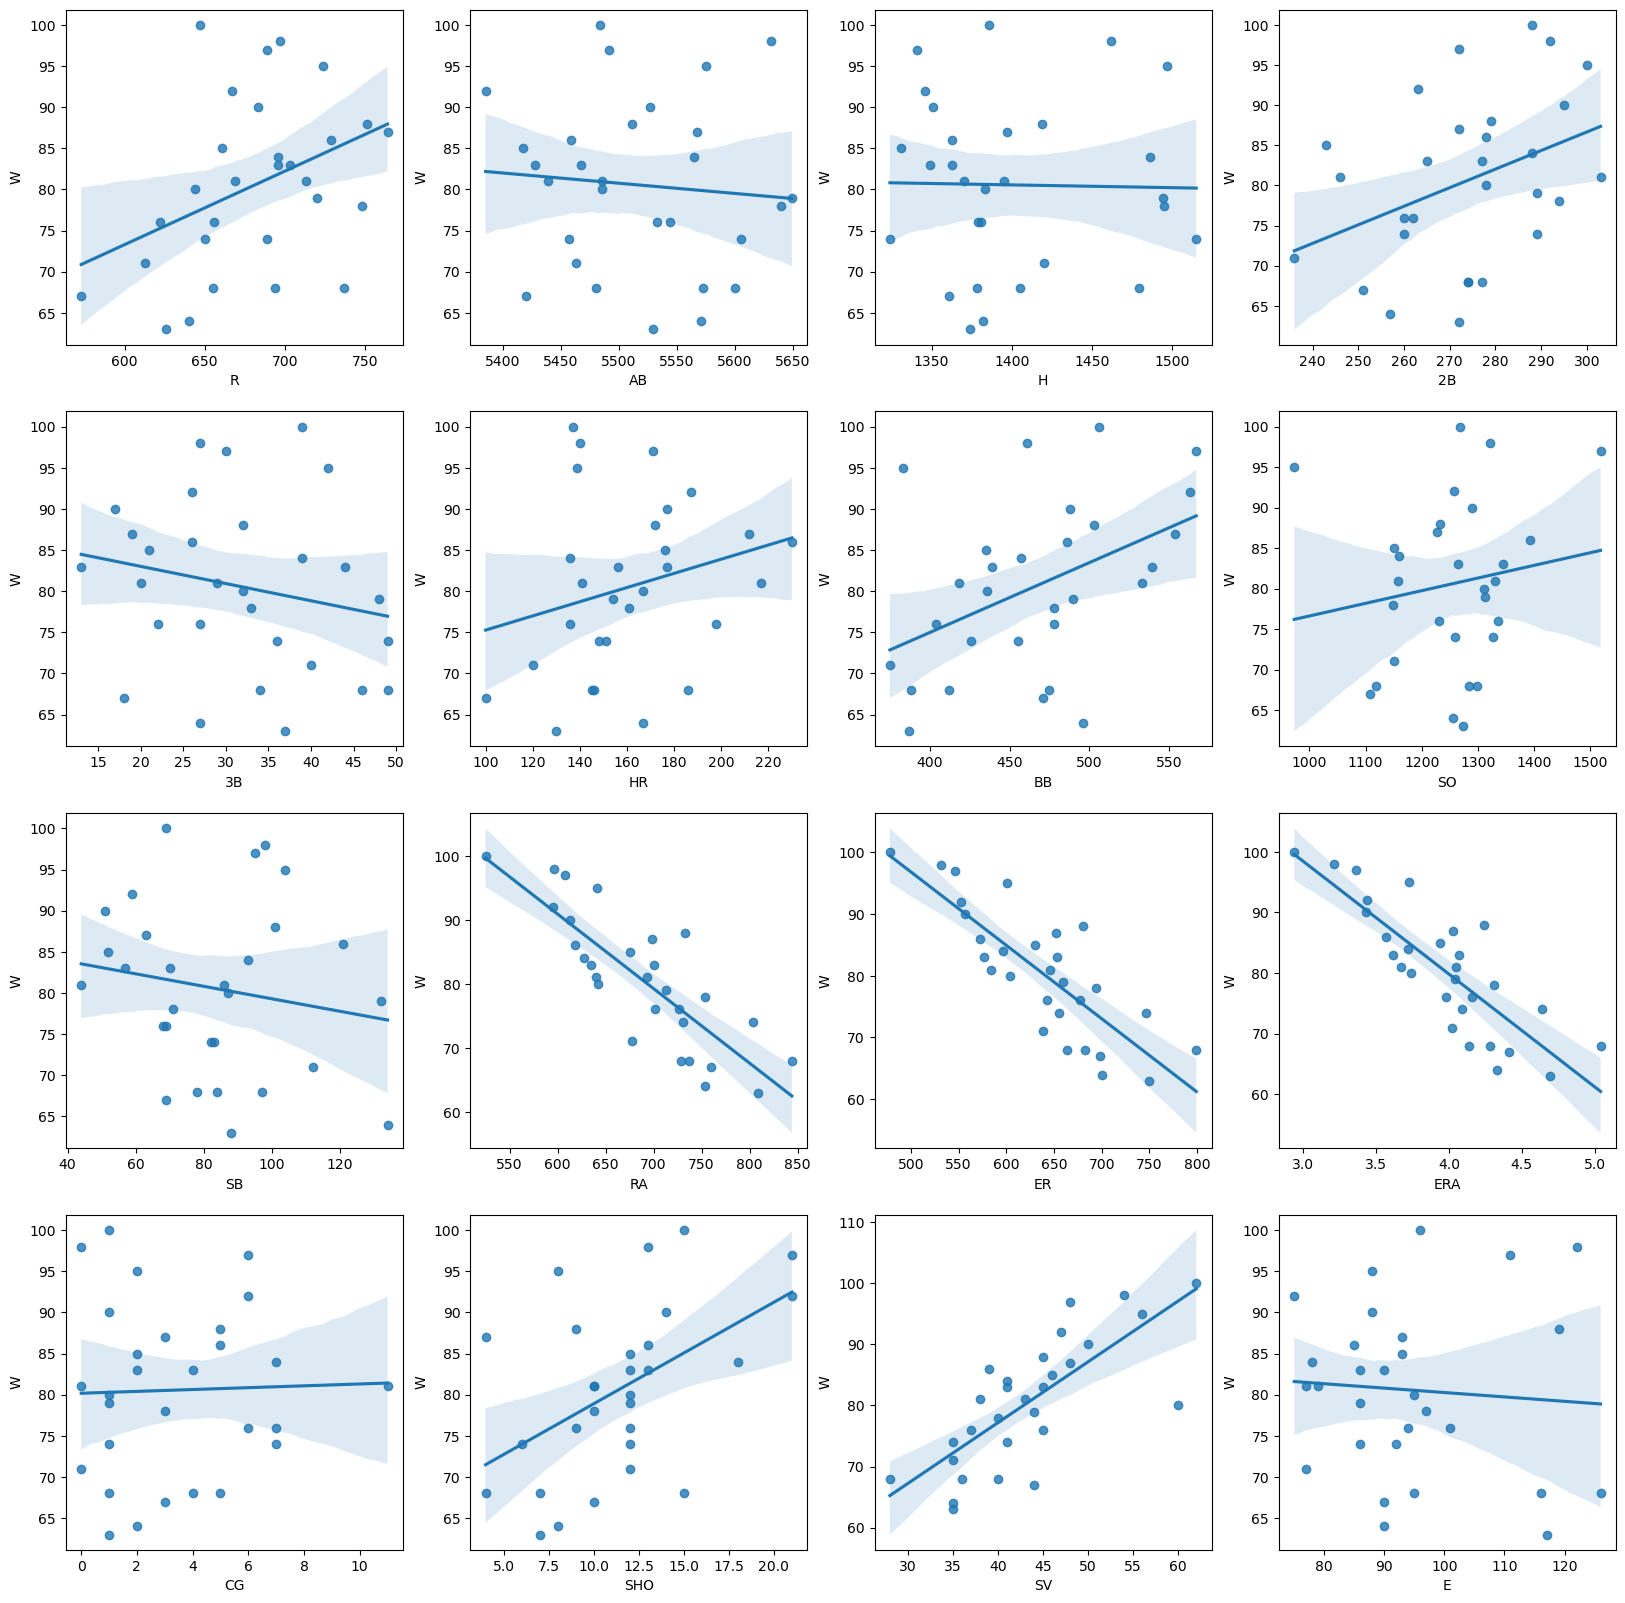

In [17]:
plt.figure(figsize=(20,20))
num = 1
for i in df.drop("W",axis=1):
    if num <= 16:
        ax = plt.subplot(4,4,num)
        sns.regplot(x=df[i],y=df["W"])
        plt.xlabel(i)
    num +=1
plt.show()

#### =>> ER ,ERA AND RA looking linearly correleted with W

<Axes: >

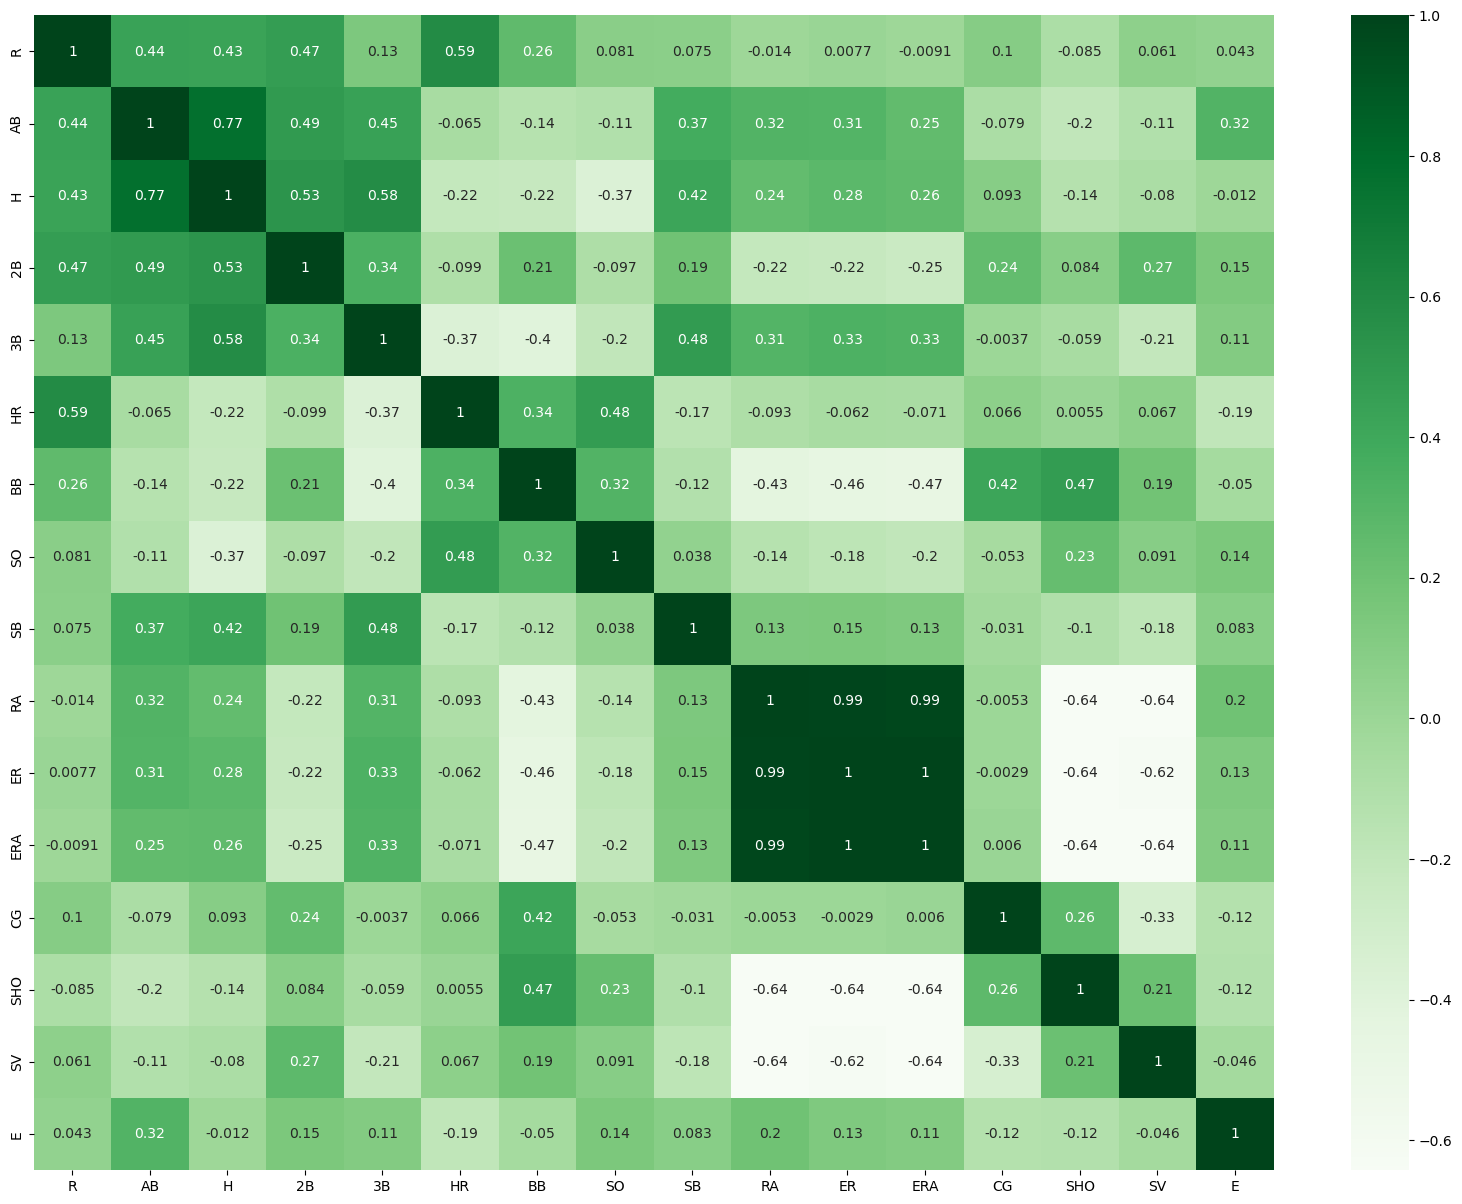

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop("W",axis=1).corr(),annot=True,cmap="Greens")

## From heatmap
* RA , ERA and ER has strong positive correletion to each other and negetive correletion with SHO and SV
* AB has correteted with H

In [19]:
## spliting data in to input variables and target variable
x = df.drop("W",axis=1)
x.shape

(29, 16)

In [20]:
y = df.iloc[:,0]
y.shape

(29,)

## Feature selection 

* Feature selection using vif

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
def vif(x):
    vif = pd.DataFrame()
    vif["Var"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [23]:
vif(x)

,Var,VIF
0,R,1684.071804
1,AB,4386.435411
2,H,4542.383497
3,2B,874.293076
4,3B,35.695117
5,HR,267.423009
6,BB,260.583556
7,SO,399.764153
8,SB,28.928494
9,RA,17975.314054


* Here RA,ERA and ER are dependent on each other we have to drop ER,and ERA beacuse high vif 

In [24]:
x.drop(["ER","ERA"],axis=1,inplace=True)

In [25]:
vif(x)

,Var,VIF
0,R,1514.482242
1,AB,3858.355047
2,H,3837.311630
3,2B,815.860126
4,3B,34.420497
5,HR,184.136303
6,BB,234.111144
7,SO,319.059772
8,SB,27.021007
9,RA,468.356493


* now AB , R and H have high vif we have to drop it

In [26]:
x.drop(["AB","H"],axis=1,inplace=True)

In [27]:
vif(x)

,Var,VIF
0,R,900.062732
1,2B,677.423155
2,3B,29.449795
3,HR,143.698241
4,BB,199.818703
5,SO,285.145877
6,SB,21.212686
7,RA,152.832439
8,CG,5.352253
9,SHO,19.352894


**spliting data into train and test**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
print('x_train:',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train: (20, 12)
x_test (9, 12)
y_train (20,)
y_test (9,)


# Model Bulding

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[ 0.10972844 -0.04753109 -0.05590314 -0.0661199  -0.00518472  0.00969925
 -0.04088845 -0.06341044  0.53924084  0.26568491  0.56993899 -0.00303618]
39.01409105774539


In [32]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [33]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_train,y_train_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ),"\n")

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_test,y_test_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

<-----------------train data----------------->
r2_score: 0.9169209722394872
mean_absolute_error: 2.365374716852803
mean_squared_error: 8.876786418641391
adj_r2: 0.8546117014191026 

<-----------------test data----------------->
r2_score: 0.9295712229448023
mean_absolute_error: 2.2691061378480635
mean_squared_error: 6.903759133558883
adj_r2: 0.8767496401534041


### RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [37]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_train,y_train_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ),"\n")

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_test,y_test_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

<-----------------train data----------------->
r2_score: 0.9631180420693044
mean_absolute_error: 1.7264999999999993
mean_squared_error: 3.9407449999999975
adj_r2: 0.9354565736212828 

<-----------------test data----------------->
r2_score: 0.2648230982367752
mean_absolute_error: 7.1844444444444475
mean_squared_error: 72.06548888888895
adj_r2: -0.28655957808564336


### Adaboostregressor

In [38]:
from sklearn.ensemble import AdaBoostRegressor

In [39]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [40]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [41]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_train,y_train_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ),"\n")

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_test,y_test_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

<-----------------train data----------------->
r2_score: 0.9910137696249327
mean_absolute_error: 0.60625
mean_squared_error: 0.96015625
adj_r2: 0.9842740968436322 

<-----------------test data----------------->
r2_score: 0.13496851385390396
mean_absolute_error: 6.900000000000001
mean_squared_error: 84.79444444444447
adj_r2: -0.5138051007556681


### GradientBoostingRegressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
Gb = GradientBoostingRegressor()
Gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [44]:
y_train_pred = Gb.predict(x_train)
y_test_pred = Gb.predict(x_test)

In [45]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_train,y_train_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ),"\n")

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_test,y_test_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

<-----------------train data----------------->
r2_score: 0.9999999618165487
mean_absolute_error: 0.0017288257427235721
mean_squared_error: 4.079806312086744e-06
adj_r2: 0.9999999331789602 

<-----------------test data----------------->
r2_score: 0.028527928374992184
mean_absolute_error: 8.726519726561007
mean_squared_error: 95.22824998398225
adj_r2: -0.7000761253437637


### knn

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [48]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [49]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_train,y_train_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ),"\n")

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_test,y_test_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

<-----------------train data----------------->
r2_score: 0.7178408479374812
mean_absolute_error: 4.619999999999999
mean_squared_error: 30.147999999999985
adj_r2: 0.5062214838905921 

<-----------------test data----------------->
r2_score: 0.23289168765743073
mean_absolute_error: 6.91111111111111
mean_squared_error: 75.19555555555556
adj_r2: -0.34243954659949627


### SVR

In [50]:
from sklearn.svm import SVR

In [51]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [52]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

In [53]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_train,y_train_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ),"\n")

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("adj_r2:" , 1 - ( 1-r2_score(y_test,y_test_pred) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

<-----------------train data----------------->
r2_score: 0.00320902571542514
mean_absolute_error: 8.15883232208111
mean_squared_error: 106.50462362487113
adj_r2: -0.7443842049980061 

<-----------------test data----------------->
r2_score: -0.003744717187046609
mean_absolute_error: 8.912143370582866
mean_squared_error: 98.39176610450801
adj_r2: -0.7565532550773315


**>>> Here LinearRegression has train r2 score 92% and test r2 score 93% threrfore threr is no case of overfitting and underfitting also LinearRegression is not have hyperparametric tunig then this model is final model**

saving model

In [54]:
import joblib

In [55]:
joblib.dump(lr,"lr_model.obj")

['lr_model.obj']

In [56]:
lr_job = joblib.load("lr_model.obj") # load model

Pridiction 

In [57]:
def pred(x):
    x = np.array(x).reshape(1,-1)
    print(np.round(lr_job.predict(x)))

In [58]:
# ans = 93
x = [891,308,17,232,570,1151,88,670,7,10,34,88]
pred(x)

[94.]


In [59]:
# ans = 74
x = [650,260,36,148,426,1327,82,731,1,6,41,92]
pred(x)

[72.]
